In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
# this web scrapping only for page 1.

url = "https://books.toscrape.com/catalogue/page-1.html"


In [5]:
response = requests.get(url)

In [6]:
response = response.content

In [7]:
response

b'\n\n<!DOCTYPE html>\n<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!--> <html lang="en-us" class="no-js"> <!--<![endif]-->\n    <head>\n        <title>\n    All products | Books to Scrape - Sandbox\n</title>\n\n        <meta http-equiv="content-type" content="text/html; charset=UTF-8" />\n        <meta name="created" content="24th Jun 2016 09:30" />\n        <meta name="description" content="" />\n        <meta name="viewport" content="width=device-width" />\n        <meta name="robots" content="NOARCHIVE,NOCACHE" />\n\n        <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->\n        <!--[if lt IE 9]>\n        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>\n        <![endif]-->\n\n        \n            <link rel="shortcut icon"

In [8]:
soup = BeautifulSoup(response,'html.parser')


In [9]:
soup


<!DOCTYPE html>

<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:30" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="../static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="../static/oscar/css/styles.css" rel="stylesheet" type="text/css"/>
<link 

In [14]:
ol = soup.find('ol')
ol

<ol class="row">
<li class="col-xs-6 col-sm-4 col-md-3 col-lg-3">
<article class="product_pod">
<div class="image_container">
<a href="a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="../media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>
</li>
<li class="col-xs-6 col-sm-4 col-md-3 col-lg-3">
<article class="product_pod">
<div class="image_container">
<a href="tipping-th

In [11]:
articles = ol.find_all("article",class_="product_pod")

In [12]:
articles

[<article class="product_pod">
 <div class="image_container">
 <a href="a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="../media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
 </div>
 <p class="star-rating Three">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>
 <h3><a href="a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
 <div class="product_price">
 <p class="price_color">£51.77</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>
 </article>,
 <article class="product_pod">
 <div class="image_container">
 <a href="tipping-the-velvet_999/index.html"><img alt="Tipping the Velvet" class="thumbnail" src="../media/cache

In [13]:
books = []
for article in articles:
    image = article.find('img')
    title = image.attrs['alt']
    star  = article.find('p')
    star  = star['class'][1]
    price = article.find('p',class_="price_color").text
    price = float(price[1:])
    books.append([title,star,price])

print(books)

[['A Light in the Attic', 'Three', 51.77], ['Tipping the Velvet', 'One', 53.74], ['Soumission', 'One', 50.1], ['Sharp Objects', 'Four', 47.82], ['Sapiens: A Brief History of Humankind', 'Five', 54.23], ['The Requiem Red', 'One', 22.65], ['The Dirty Little Secrets of Getting Your Dream Job', 'Four', 33.34], ['The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull', 'Three', 17.93], ['The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics', 'Four', 22.6], ['The Black Maria', 'One', 52.15], ['Starving Hearts (Triangular Trade Trilogy, #1)', 'Two', 13.99], ["Shakespeare's Sonnets", 'Four', 20.66], ['Set Me Free', 'Five', 17.46], ["Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)", 'Five', 52.29], ['Rip it Up and Start Again', 'Five', 35.02], ['Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991', 'Three', 57.25], ['Olio', 'One', 23.88], ['Mesaerion: The Best Science Fiction Storie

## web scrapping for all pages.


In [25]:
books = []
for i in range(1,51):
    url = f"https://books.toscrape.com/catalogue/page-{i}.html"
    response = requests.get(url)
    response = response.content
    soup = BeautifulSoup(response,'html.parser')
    ol = soup.find('ol')
    articles = ol.find_all("article",class_="product_pod")

    for article in articles:
        image = article.find('img')
        title = image.attrs['alt']
        star  = article.find('p')
        star  = star['class'][1]
        price = article.find('p',class_="price_color").text
        price = float(price[1:])
        books.append([title,price,star])

df = pd.DataFrame(books,columns=["Title","Price","Star_rating"])

df.to_csv("Books.csv")

In [26]:
df.head()

,Title,Price,Star_rating
0,A Light in the Attic,51.77,Three
1,Tipping the Velvet,53.74,One
2,Soumission,50.10,One
3,Sharp Objects,47.82,Four
4,Sapiens: A Brief History of Humankind,54.23,Five


In [55]:
df.shape

(1000, 3)

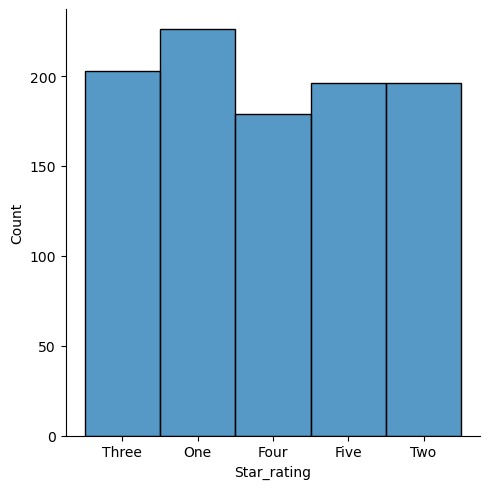

In [54]:
sns.displot(data=df,x="Star_rating",kind="hist")
plt.show()
# print(sns.displot(data=tips,x="total_bill",kind="hist",hue = "sex",bins=10))

In [56]:
df[df["Star_rating"]=="Three"].shape

(203, 3)

In [57]:
df[df["Star_rating"]=="One"].shape

(226, 3)

In [58]:
df[df["Star_rating"]=="Two"].shape

(196, 3)

In [59]:
df[df["Star_rating"]=="Four"].shape

(179, 3)

In [60]:
df[df["Star_rating"]=="Five"].shape

(196, 3)

In [4]:
df = pd.read_csv("Books.csv")
df.head()

,Unnamed: 0,Title,Price,Star_rating
0,0,A Light in the Attic,51.77,Three
1,1,Tipping the Velvet,53.74,One
2,2,Soumission,50.10,One
3,3,Sharp Objects,47.82,Four
4,4,Sapiens: A Brief History of Humankind,54.23,Five


In [5]:
df.columns

Index(['Unnamed: 0', 'Title', 'Price', 'Star_rating'], dtype='object')

In [6]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

,Title,Price,Star_rating
0,A Light in the Attic,51.77,Three
1,Tipping the Velvet,53.74,One
2,Soumission,50.10,One
3,Sharp Objects,47.82,Four
4,Sapiens: A Brief History of Humankind,54.23,Five


In [7]:
df["Price"].isna().sum()

0